In [6]:
from glob import glob
import json
import pandas as pd
import cufflinks as cf
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import statsmodels
import sqlite3
from collections import Counter
from matplotlib import pyplot as plt

In [7]:
jsonFiles = [open(f).read() for f in glob('results-json/*')]

In [8]:
parsedFiles = [json.loads(jsonFile) for jsonFile in jsonFiles]

In [9]:
len(parsedFiles[0])

37

In [10]:
allData = {}
for fileData in parsedFiles:
    for bookData in fileData: 
        colorData = {itemDict['colorWord']: itemDict['nMatches'] for itemDict in bookData[0]['statsList']}
        allData[bookData[0]['textName']] = colorData                                        

In [11]:
df = pd.DataFrame(allData)

In [12]:
df = df.T.sort_index()

In [13]:
df

,black,midnight,dark,blood,brown,crimson,dusk,violet,red,earth,...,terracotta,light lavender,hot green,warm pink,pale magenta,violet pink,brownish purple,bluey green,algae,macaroni and cheese
1880-DoraThorne-2374,0.000012,NaN,0.000182,0.000005,NaN,0.000023,NaN,0.000007,0.000004,0.000032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880-GreeneFerneFarm-37046,0.000102,NaN,0.000128,0.000053,0.000071,0.000031,0.000009,0.000009,0.000084,0.000093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880-JezebelsDaughter-3633,0.000021,0.000002,0.000030,0.000012,0.000005,NaN,NaN,0.000002,0.000018,0.000004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880-RoundAboutaGreatEstate-20528,0.000114,0.000005,0.000041,0.000010,0.000077,0.000005,0.000005,0.000005,0.000067,0.000026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880-ShakespearesInsomniaandtheCausesThereof-11990,NaN,NaN,0.000020,0.000020,NaN,NaN,NaN,0.000020,NaN,0.000039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925-TheVerseBookofaHomelyWoman-3477,0.000017,NaN,0.000052,NaN,0.000069,0.000017,0.000017,0.000034,0.000052,0.000103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192511-ModernBritishPoetry-26785,0.000082,0.000023,0.000085,0.000056,0.000036,0.000023,0.000013,0.000007,0.000088,0.000170,...,NaN,NaN,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192711-OliverCromwellAPlay-17091,NaN,0.000012,0.000012,0.000058,NaN,NaN,NaN,NaN,0.000012,0.000023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-BrowningsShorterPoems-16376,0.000067,0.000010,0.000030,0.000070,0.000020,NaN,0.000007,NaN,0.000077,0.000157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
xkcdMap = json.load(open('../data/maps/xkcd/rgb.json'))

In [15]:
xkcdMap['black']

'#000000'

In [16]:
def combineHexes(colorDict):
    """
    Proportionally mix hex colors from dict like {"ffffff": 1.0, "0000ff": 0.5 ... }
    """
    colors = sorted(colorDict.items())
    weights = sum(colorDict.values())
    if weights == 0:
        return
    red = int(sum([int(k[:2], 16)*v for k, v in colors])/weights)
    green = int(sum([int(k[2:4], 16)*v for k, v in colors])/weights)
    blue = int(sum([int(k[4:6], 16)*v for k, v in colors])/weights)
    zpad = lambda x: x if len(x)==2 else '0' + x
    return zpad(hex(red)[2:]) + zpad(hex(green)[2:]) + zpad(hex(blue)[2:])

In [17]:
for i, row in df.iterrows(): 
    data = row[row.notna()].to_dict()
    hexes = {}
    for color, prop in data.items(): 
        colorHex = xkcdMap.get(color)
        if colorHex is None: 
            continue
        hexes[colorHex[1:]] = prop
    avg = combineHexes(hexes)
    df.loc[i, 'avg'] = avg

In [18]:
df['avg']

1880-DoraThorne-2374                                  99987d
1880-GreeneFerneFarm-37046                            8b855f
1880-JezebelsDaughter-3633                            9d6c65
1880-RoundAboutaGreatEstate-20528                     9d9a60
1880-ShakespearesInsomniaandtheCausesThereof-11990    a48a42
                                                       ...  
1925-TheVerseBookofaHomelyWoman-3477                  8f7e68
192511-ModernBritishPoetry-26785                      8b7f69
192711-OliverCromwellAPlay-17091                      7f6c4f
1928-BrowningsShorterPoems-16376                      8c7259
1928-TheBrotherofDaphne-748                           8a5560
Name: avg, Length: 796, dtype: object

In [19]:
df['avg'].to_json('averages.json')

In [20]:
df['pgId'] = [fn[-1] for fn in df.index.str.split('-')]

# Metadata

In [21]:
conn = sqlite3.connect('/home/jon/Corpora/pg-text-7.db')

In [22]:
c = conn.cursor()

In [23]:
def getAuthor(textName):
    textId = textName.split('-')[-1]
    c.execute('select author from meta where id=?', [str(float(textId))])
    return c.fetchone()[0]

In [24]:
for i, row in df.iterrows(): 
    bookId = i.split('-')[-1]
    author = getAuthor(bookId)
    df.loc[i, 'author'] = author

In [59]:
dfAuthor = df.groupby('author').mean()

In [26]:
for i, row in dfAuthor.iterrows(): 
    data = row[row.notna()].to_dict()
    hexes = {}
    for color, prop in data.items(): 
        colorHex = xkcdMap.get(color)
        if colorHex is None: 
            continue
        hexes[colorHex[1:]] = prop
    avg = combineHexes(hexes)
    dfAuthor.loc[i, 'avg'] = avg

In [27]:
dfAuthor['avg']

author
                        82765e
Alexander, Mrs.         8c7d6b
Allan, Luke             5f6675
Allen, Grant            967965
Anonymous               ba7575
                         ...  
Woolf, Virginia         888369
Wren, Jenny             7c8361
Yates, Dornford         8d4f5e
Young, Francis Brett    8f896f
Zangwill, Israel        8e7761
Name: avg, Length: 262, dtype: object

In [28]:
dfAuthor['avg'].to_json('averages-author.json')

In [41]:
dfAuthor

,black,midnight,dark,blood,brown,crimson,dusk,violet,red,earth,...,terracotta,light lavender,hot green,warm pink,pale magenta,violet pink,brownish purple,bluey green,algae,macaroni and cheese
author,,,,,,,,,,,,,,,,,,,,,
,0.000917,0.000222,0.000934,0.000512,0.000231,0.000104,0.000116,0.000033,0.000815,0.000807,...,0.0,0.0,0.000003,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
"Alexander, Mrs.",0.000044,0.000001,0.000045,0.000007,0.000014,0.000004,0.000003,0.000000,0.000022,0.000008,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
"Allan, Luke",0.000017,0.000012,0.000061,0.000087,0.000014,0.000003,0.000003,0.000000,0.000014,0.000029,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
"Allen, Grant",0.000559,0.000008,0.000264,0.000471,0.000190,0.000097,0.000008,0.000000,0.000494,0.000700,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000002
Anonymous,0.000000,0.000000,0.000017,0.000011,0.000000,0.000006,0.000000,0.000000,0.000006,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Woolf, Virginia",0.000348,0.000037,0.000293,0.000059,0.000166,0.000043,0.000050,0.000041,0.000450,0.000253,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
"Wren, Jenny",0.000045,0.000000,0.000007,0.000000,0.000007,0.000007,0.000000,0.000000,0.000015,0.000037,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
"Yates, Dornford",0.000074,0.000007,0.000132,0.000040,0.000103,0.000000,0.000014,0.000002,0.000120,0.000068,...,0.0,0.0,0.000000,0.000002,0.0,0.0,0.0,0.0,0.0,0.000000


In [61]:
dfAuthor.sum(axis=1).sort_values(ascending=False).head(30)

author
Custance, Olive                                          0.005390
De la Mare, Walter                                       0.004363
Young, Francis Brett                                     0.004233
Colum, Padraic                                           0.003542
Thackeray, William Makepeace                             0.003266
Blind, Mathilde                                          0.003251
Carman, Bliss                                            0.003229
Huxley, Aldous                                           0.003174
Noyes, Alfred                                            0.003120
Dunsany, Lord                                            0.003108
Masefield, John                                          0.003095
Wilde, Oscar                                             0.003007
Graves, Robert                                           0.002985
Sackville-West, Vita (Victoria Mary)                     0.002852
Burke, Thomas                                            0.002830
Mar

In [43]:
dfAuthor[['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'violet', 'black', 'white', 'grey', 'brown']].sum().sort_values(ascending=False)

white     0.072279
black     0.050090
red       0.039819
green     0.030233
blue      0.029297
grey      0.020969
brown     0.018961
yellow    0.014917
purple    0.005473
violet    0.003151
orange    0.002689
dtype: float64

In [35]:
def commonColorsByAuthor(author): 
    threshold = dfAuthor.loc[author].sum() * 0.03
    return dfAuthor.loc[author][dfAuthor.loc[author] > threshold]

In [46]:
dfWoolf = commonColorsByAuthor('Woolf, Virginia')
dfWoolf.index

Index(['black', 'dark', 'red', 'earth', 'sky', 'yellow', 'white', 'blue',
       'rose', 'sea', 'green', 'tea'],
      dtype='object')

In [45]:
dfAuthor.loc['Wilde, Oscar'].sum()

0.019771713353581768

TypeError: pie() got an unexpected keyword argument 'color_map'

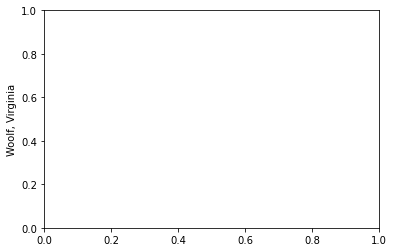

In [132]:
commonColorsByAuthor('Woolf, Virginia')

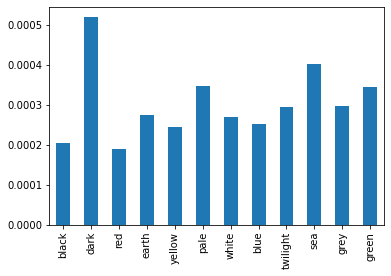

In [95]:
def plotColorsAuthor(author): 
    
commonColorsByAuthor('Joyce, James')

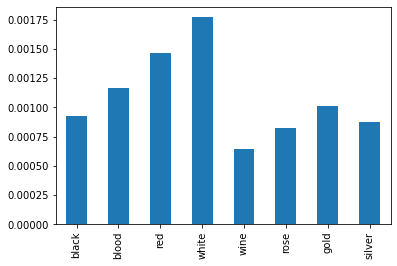

In [96]:
commonColorsByAuthor('Wilde, Oscar')

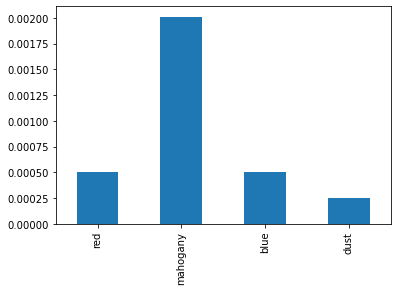

In [97]:
commonColorsByAuthor('Thackeray, William Makepeace')

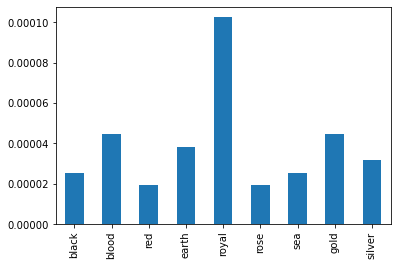

In [98]:
commonColorsByAuthor('Shakespeare, William')

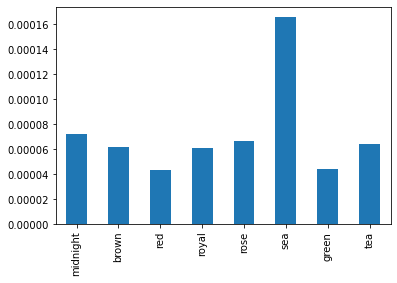

In [99]:
commonColorsByAuthor('Carroll, Lewis')